# **Общая информация о датасете**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('music_genre.csv', sep=",")
data.dropna(inplace=True)
data['tempo'] = data['tempo'].replace("?", 120.0)
data = data.drop('obtained_date', axis=1)
data = data.drop('instance_id', axis=1)

In [ ]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artist_name'] = label_encoder.fit_transform(data['artist_name'])
data['track_name'] = label_encoder.fit_transform(data['track_name'])
data['key'] = label_encoder.fit_transform(data['key'])
data['mode'] = label_encoder.fit_transform(data['mode'])
data['music_genre'] = label_encoder.fit_transform(data['music_genre'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  int64  
 1   track_name        50000 non-null  int64  
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  int64  
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  int64  
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  valence           50000 non-null  float64
 15  music_genre       50000 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory us

# **Разделение на обучающую и тестовую выборки**

In [ ]:
data['music_genre'].unique()

array([5, 1, 7, 0, 4, 8, 2, 9, 3, 6])

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 40000
Test size: 10000


In [ ]:
X_train = train.drop('music_genre', axis=1)
y_train = train['music_genre']
X_test = test.drop('music_genre', axis=1)
y_test = test['music_genre']

# **Лаба 5**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier(random_state=42)
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy Bagging: {accuracy_bagging}')

Accuracy Bagging: 0.5262


In [ ]:
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'Accuracy Random Forest: {accuracy_random_forest}')

Accuracy Random Forest: 0.5551


In [ ]:
y_pred_ada_boost = ada_boost_model.predict(X_test)
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
print(f'Accuracy AdaBoost: {accuracy_ada_boost}')

Accuracy AdaBoost: 0.4918


In [ ]:
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(f'Accuracy Gradient Boosting: {accuracy_gradient_boosting}')

Accuracy Gradient Boosting: 0.6093


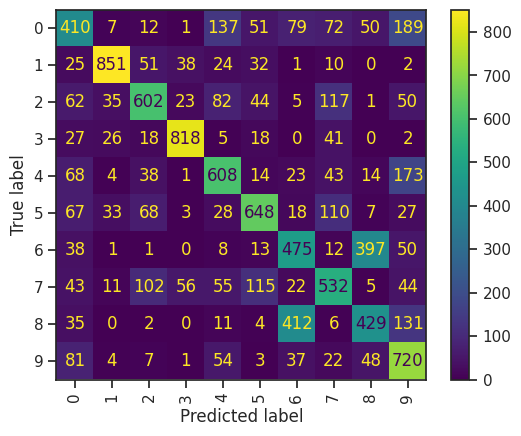

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gradient_boosting, xticks_rotation='vertical')

# **Лаба 6**



In [ ]:
!pip install gmdh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.3/875.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
from gmdh import split_data

X_gmdh = data.drop('music_genre', axis=1)
y_gmdh = data['music_genre']
X_train_gmdh, X_test_gmdh, y_train_gmdh, y_test_gmdh = split_data(X_gmdh, y_gmdh)

In [ ]:
from gmdh import Combi, Criterion, CriterionType

combi_model = Combi()
combi_model.fit(X_train_gmdh, y_train_gmdh, verbose=1, n_jobs=-1, test_size=0.2, limit=0, criterion=Criterion(CriterionType.REGULARITY))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LEVEL 1  [=========================] 100% :00s] (15 combinations) error=80536.316159
LEVEL 2  [=========================] 100% :00s] (105 combinations) error=80264.331935
LEVEL 3  [=========================] 100% :01s] (455 combinations) error=80025.672677
LEVEL 4  [=========================] 100% :03s] (1365 combinations) error=80012.091805
LEVEL 5  [=========================] 100% :12s] (3003 combinations) error=79998.943649
LEVEL 6  [=========================] 100% :19s] (5005 combinations) error=80075.215464


In [ ]:
from gmdh import Mia

mia_model = Mia()
mia_model.fit(X_train_gmdh, y_train_gmdh, verbose=1, n_jobs=-1, test_size=0.2, limit=0, criterion=Criterion(CriterionType.REGULARITY))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LEVEL 1  [=========================] 100% :00s] (105 combinations) error=79160.546248
LEVEL 2  [=========================] 100% :00s] (3 combinations) error=78569.402984
LEVEL 3  [=========================] 100% :00s] (3 combinations) error=78772.743671


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(y_test, y_pred, squared=False):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    crit_name = "MSE" if squared else "RMSE"
    print(f"{crit_name}: {mean_squared_error(y_test, y_pred, squared=squared)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred_combi = combi_model.predict(X_test_gmdh)

print(combi_model.get_best_polynomial())
print_metrics(y_test_gmdh, y_pred_combi)

y = 0.0817*x3 + 1.6267*x8 - 0.0037*x9 - 0.0485*x10 + 0.4033*x15 + 0.0957
R^2: 0.2095901553852434
RMSE: 1.3335749511681758
MAE: 1.1427599891333444


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred_mia = mia_model.predict(X_test_gmdh)

print(mia_model.get_best_polynomial())
print_metrics(y_test_gmdh, y_pred_mia)

f1_1 = 0.0477*x3 - 1.9591*x10 + 0.0058*x3*x10 + 0.0003*x3^2 + 1.9599*x10^2 + 1.665
f1_2 = 0.0435*x3 + 2.4693*x8 + 0.0258*x3*x8 + 0.0004*x3^2 - 2.1753*x8^2 + 1.0256

y = - 1.7521*f1_1 + 2.5847*f1_2 - 0.4759*f1_1*f1_2 + 0.4674*f1_1^2 + 0.0298*f1_2^2 + 0.2957
R^2: 0.27073304536052023
RMSE: 1.2809569266524263
MAE: 1.1186075328012912


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(32, 20, 10), activation='relu', solver='adam', max_iter=100)
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MLPClassifier(hidden_layer_sizes=(32, 20, 10), max_iter=100)

In [ ]:
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy MLP: {accuracy_mlp}')

Accuracy MLP: 0.0979


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

estimators = [
    ('mlp', mlp_model),
    ('random_forest', random_forest_model),
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


StackingClassifier(estimators=[('mlp',
                                MLPClassifier(hidden_layer_sizes=(32, 20, 10),
                                              max_iter=100)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy Stacking: {accuracy_stacking}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy Stacking: 0.6231
